In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
df=pd.read_csv('https://lukeb.co//python_csv')
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
import ast 
df['job_skills'] = df['job_skills'].apply(
    lambda skill: ast.literal_eval(skill) if isinstance(skill, str) else skill
)

c:\Users\HP\anaconda3\envs\pn_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## what they pay for thier associated skills


In [2]:
# filter for data anaylsis and united states
df_DA_US= df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']== 'United States')].copy()
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
#exolode 
df_DA_US=df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg','job_skills']]


,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [4]:
# another way by group by
df_DA_US=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

#['salary_year_avg']`→ selects only the column salary_year_avg from each group of job short title
#  to apply calculations on salary_year_avg`


## now we want two datafram one with top high salary, another with top skill demand 

In [5]:
df_DA_US_top_pay=df_DA_US.sort_values(by=('median') ,ascending=False).head(10)


df_DA_US_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [6]:
df_DA_US_skills=df_DA_US.sort_values(by=('count') ,ascending=False).head(10).sort_values(by=('median') ,ascending=False)
df_DA_US_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


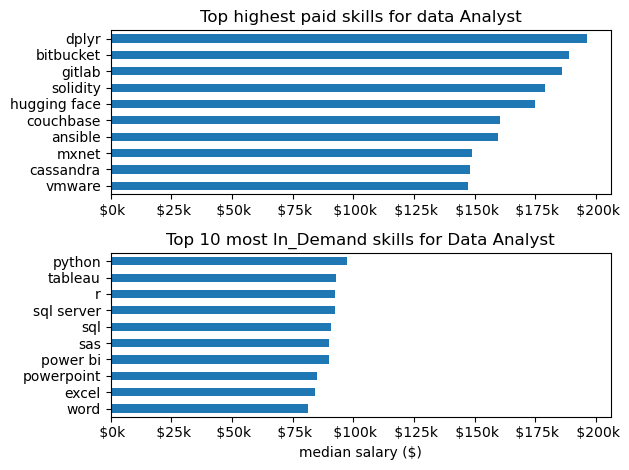

In [7]:
fig,ax=plt.subplots(2,1)

df_DA_US_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0])
#ax[0].invert_yaxis() is same as df_DA_US_top_pay[::-1]

ax[0].set_title('Top highest paid skills for data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f' ${int(x/1000)}k'))
ax[0].legend().set_visible(False)


df_DA_US_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 most In_Demand skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('median salary ($)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f' ${int(x/1000)}k'))

fig.tight_layout()

## notes

In [103]:
#Pivot tables often create MultiIndex (nested) columns, 
# so it better to not use pivot tables because you need to clean or flatten them first.

#in this code :ax[1].set_xlim(ax[0].get_xlim())
# get_xlim() → asks the plot: “what are your x-axis limits?”
#set_xlim() → tells the plot: “use these x-axis limits.”

# you should learn about cloud 

"""
In a horizontal bar chart (barh),
the y parameter chooses the data for bar lengths (x-axis),
not the vertical axis.
"""

'\nIn a horizontal bar chart (barh),\nthe y parameter chooses the data for bar lengths (x-axis),\nnot the vertical axis.\n'